# Mesh Refinement Python Mesh
This script will contain the code for refining the meshes made by a other python script. For both the triangular mesh as well as for the square one.

**Square Mesh Refinement**

C:\Users\20192167\Anaconda3\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


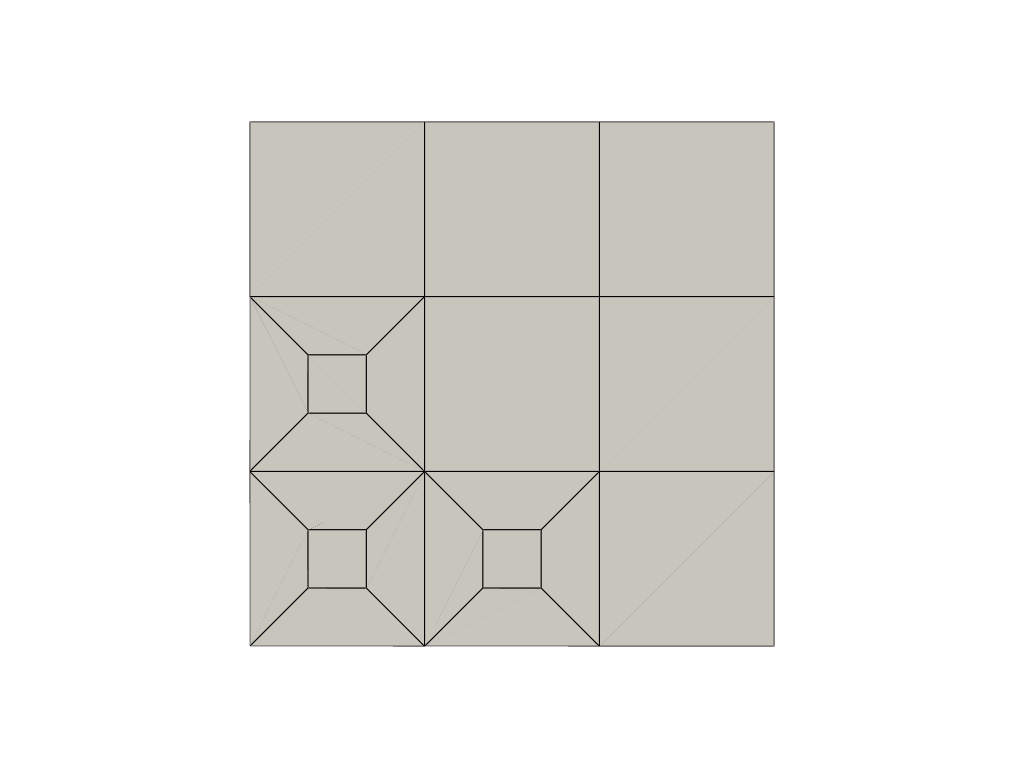

In [1]:
import numpy as np
import pyvista

points = np.array([[0,0,0],
                     [1,0,0],
                     [1,1,0],
                     [0,1,0],
                     [2,1,0],
                     [2,0,0],
                     [0,2,0],
                     [1,2,0],
                     [2,2,0],
                     [0,3,0],
                     [1,3,0],
                     [2,3,0],
                     [3,0,0],
                     [3,1,0],
                     [3,2,0],
                     [3,3,0]])

# mesh faces
cells = ([[4, 0,1,2,3],
        [4, 1,5,4,2],
        [4, 2,7,6,3],
        [4, 2,4,8,7],
        [4, 6,7,10,9],
        [4, 7,8,11,10],
        [4, 8,14,15,11],
        [4, 4, 13,14,8],
        [4, 5,12,13,4]]) 

c = [3,2,9] #number of the cell you wish to refine
for cx in range(0,len(c)):
    d1 = cells[cx][1]
    d2 = cells[cx][2]
    d3 = cells[cx][3]
    d4 = cells[cx][4]

    #Adding the additional points
    point1 = ((points[d3]+2*points[d1])/3) 
    point2 = ((2*points[d3]+points[d1])/3)
    point3 = ((points[d2]+2*points[d4])/3)
    point4 = (((2*points[d2])+points[d4])/3)
    points = np.vstack([points,point1,point2,point3,point4])

    g = len(points) #total number of points in the mesh

    #Altering the mesh 
    cells[cx]= [4, d1,d2,(g-1),(g-4)]
    cells = np.vstack([cells, [4, (g-1),d2,d3,(g-3)]])
    cells = np.vstack([cells, [4, (g-2),(g-3),d3,d4]])
    cells = np.vstack([cells, [4, d1,(g-4),(g-2),d4]])
    cells = np.vstack([cells, [4, (g-4),(g-2),(g-3),(g-1)]])

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=0.5)
pl.set_background('white')
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(len(points))],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

**Triangular Mesh Refinement**

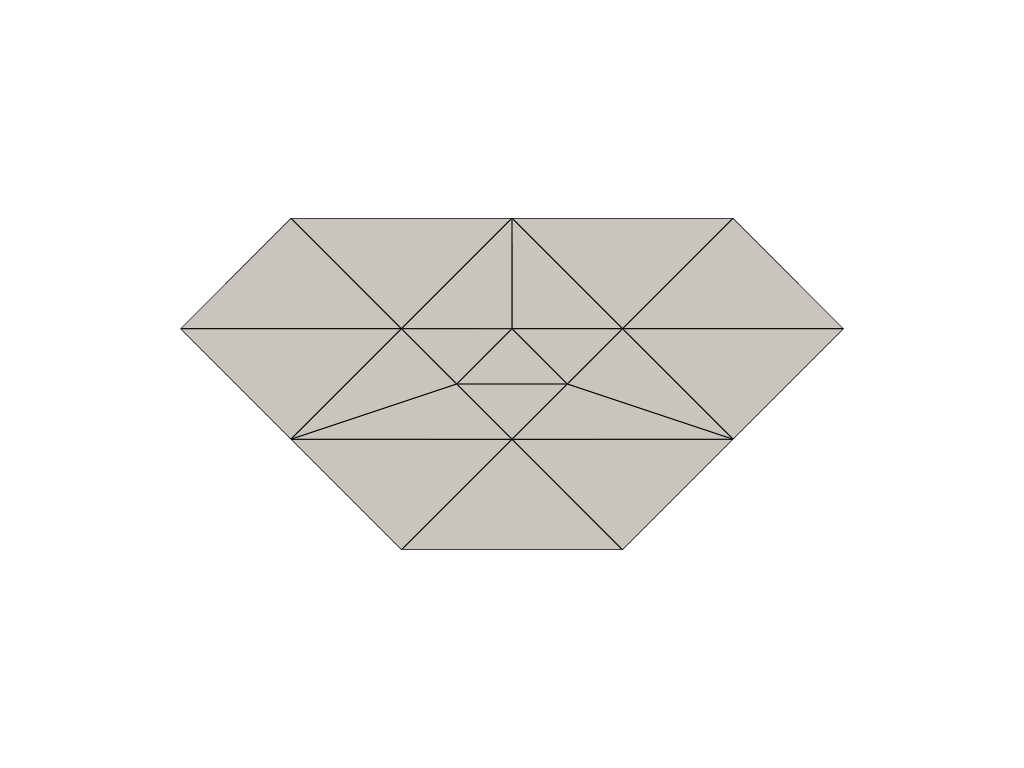

In [6]:
import numpy as np
import pyvista
import math

points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]

c = 5 #number of the cell you wish to refine
d = cells[c][1]
e = cells[c][2]
f = cells[c][3]
cy=[d,e,f] #the numbers of the points creating the cell
g = len(points) #the total number of points in the mesh
i = len(cells) #the total number of cells in the mesh


#-----Splitting the cell in four--------------------------------------------------------------------------------------#  
point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side
points = np.vstack([points,point1,point2,point3]) #adding the points to the points array

g = len(points) #the new total number of points

#changing the original cell to to the refined cell
cells[c]= [3, (g-1),(g-2),f] 
cells = np.vstack([cells, [3, d,(g-1),(g-3)]])
cells = np.vstack([cells, [3, (g-2),e,(g-3)]])
cells = np.vstack([cells, [3, (g-1),(g-2),(g-3)]])

#--------Finding the neighbouring cells-------------------------------------------------------------------------------#
y = [] #numbers of the neighbouring cells
v = 0

for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
    if d in cells[x][1:] and e in cells[x][1:]:
        y.append(x)
        v=1
if v!= 1:
    y.append(i+1) 

v=0
for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
    if e in cells[x][1:] and f in cells[x][1:]:
        y.append(x)
        v=1
if v!= 1:
    v=0 
    y.append(i+1)     

v=0
for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
    if d in cells[x][1:] and f in cells[x][1:]:
        y.append(x)
        v=1     
if v!= 1:
    v=0
    y.append(i+1)

#--------Determining which point the cells do not share---------------------------------------------------------------#
r =[]

for x in range (0,3):
    q = cells[y[x]][1:] #points in the neighbouring cell
    for x in range (0,3):
        q1 = q[x]
        if q1 in cy: #if two cells share a point
            t = 1
            r.append(t)
        else: # if two cells do not share a point
            t = 0
            r.append(t)

#---------Splitting the neighbouring cells---------------------------------------------------------------------------#
j = 0
h = 0
p = [] #a storange array for the following for loop
n = []
m = [] #an array containing the index numbers of the overlapping points

for x in range(0,len(r)+1):
    if j < 3: 
        a = r[x]
        p.append(a)
        j = j+1
    elif j == 3:  
        for z in range(0,3):
            z1=p[z]
            if z1==1:
                n.append(z)
                h=h+1
                if h == 2:
                    m.append(n[0])
                    m.append(n[1])
                    n = []
        h = 0 
        p = [] 
        n = []
        
        if x < 9:
            a = r[x]
            p.append(a)
        j=1
        h=0

n=3
j=0 

#Splitting the neigbouring cells in two
for z in range(0,3):
    u = y[z]
    if u <= i:
        d1 = cells[y[z]][1]
        e1 = cells[y[z]][2]
        f1 = cells[y[z]][3]
        cell = [3, d1, e1, f1]
        cell[m[j]+1] = g-n   
        cells[y[z]]= cell
        j=j+1
        cell = [3, d1, e1, f1]
        cell[m[j]+1] = g-n
        cells = np.vstack([cells, cell])  
        j=j+1
    n=n-1
    
#---------Plotting the new mesh--------------------------------------------------------------------------------------#
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=0.5)
pl.set_background('white')
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(len(points))],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

**Aspect Ratio**

# Plural triangular mesh refinement

1
[[0, 1, 1, 1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1]]


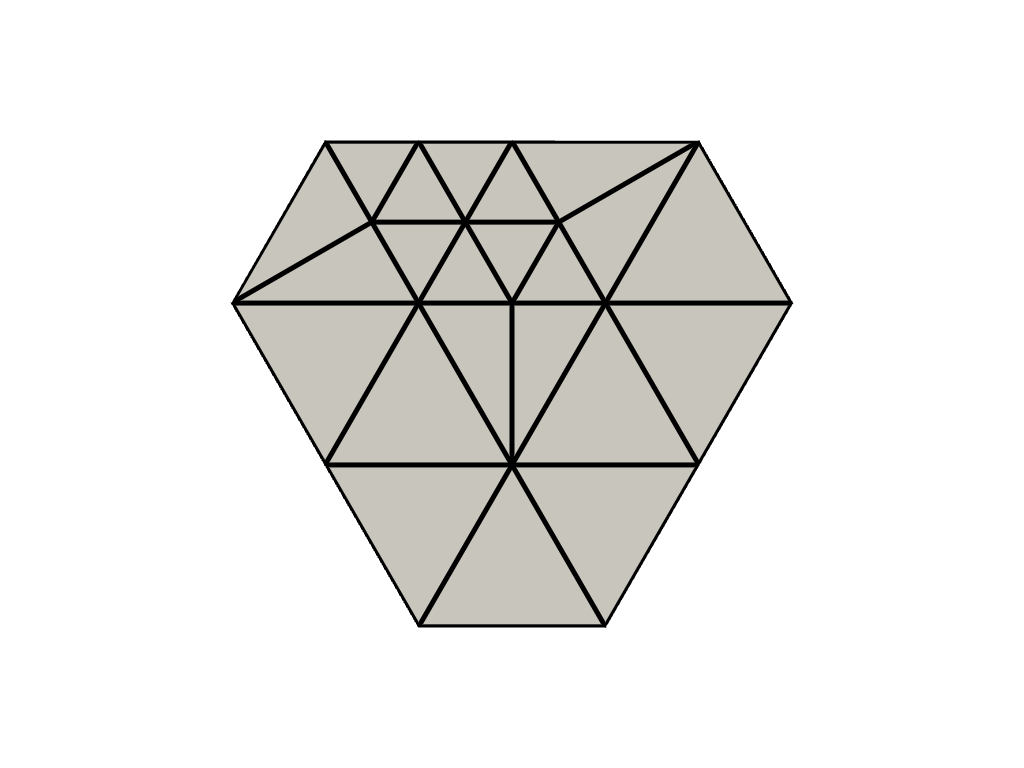

In [4]:
import numpy as np
import pyvista
import math

#Defining the points of the mesh
points = np.array([[0,0,0],
                  [2,0,0],
                  [1,math.sqrt(3),0],
                  [4,0,0],
                  [3,math.sqrt(3),0],
                  [1,-math.sqrt(3),0],
                  [3,-math.sqrt(3),0],
                  [6,0,0],
                  [5,math.sqrt(3),0],
                  [5,-math.sqrt(3),0],
                  [2,-2*math.sqrt(3),0],
                  [4,-2*math.sqrt(3),0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]

c = [1,2] #index numbers of the cell you wish to refine
      
#-------------------------------------------------------------------------------#    
#--------Finding the neighbouring cells of the cells you wish to refine---------#
#-------------------------------------------------------------------------------#

len_points = len(points) #the total number of points in the mesh
len_cells = len(cells) #the total number of cells in the mesh

clen = len(c) #the total number of cells you wish to refine
ytotal = []  #numbers of the neigbouring cells of all cells you wish to refine in array per cell
ytotaly = [] #numbers of the neigbouring cells of all cells you wish to refine

for cx in range(0,clen): #for every cell listed in array {c}
    
    d = cells[c[cx]][1] #the first point of the cell
    e = cells[c[cx]][2] #the second point of the cell
    f = cells[c[cx]][3] #the third point of the cell
    cy=[d,e,f] #the numbers of the points creating the cell

    y = [] #numbers of the neighbouring cells of cell cx
    v = 0 #temporary variable

    for x in range(0,len_cells): #for all cells in the mesh
        if d in cells[x][1:] and e in cells[x][1:]: #looks for the side DE in the other cells
            if x not in c:
                y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                ytotaly.append(x)
                v=1
    if v!= 1:
        y.append(len_cells+1) #adds a cell that is not in the mesh to the array {y}
        ytotaly.append(len_cells+1)
        
    v=0
    for x in range(0,len_cells): #for all cells in the mesh
        if e in cells[x][1:] and f in cells[x][1:]: #looks for the side EF in the other cells
            if x not in c:
                y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                ytotaly.append(x)
                v=1
    if v!= 1:
        y.append(len_cells+1) #adds a cell that is not in the mesh to the array {y}
        ytotaly.append(len_cells+1)
        
    v=0
    for x in range(0,len_cells): #for all cells in the mesh
        if d in cells[x][1:] and f in cells[x][1:]: #looks for the side DF in the other cells
            if x not in c:
                y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                ytotaly.append(x)
                v=1   
    if v!= 1:
        y.append(len_cells+1) #adds a cell that is not in the mesh to the array {y}
        ytotaly.append(len_cells+1)
        
    ytotal.append(y)
    
#-------------------------------------------------------------------------#
#---------Finding neighbouring cells that are called for twice------------#
#-------------------------------------------------------------------------#
i=0
for x in range (0,len(ytotal)): #for every cell listed in {ytotal}
    for z in range(0,3): 
        
        if ytotal[x][z] in ytotaly[3+i:]: #if the cell is listed again in {ytotal}
            if ytotal[x][z] != len_cells+1: #if it is not the additional cell added for no connection
                if ytotal[x] not in c: #if the cell is not listed in {c}
                    c.append(ytotal[x][z]) #add the cell to {c}
                    v =1
            else:
                v=0
        else:
            v =0

    i = i+3
    
if len(c)==clen: #if at least two cells share the same neighbouring cell. The code will be ran again.
    a=1
    print(a)
    
else:
    while True:
        clen=len(c) #the new total number of cells you wish to refine
        ytotal = [] #numbers of the neigbouring cells of all cells you wish to refine
        ytotaly= []
        #-------------------------------------------------------------------------------#    
        #--------Finding the neighbouring cells of the cells you wish to refine---------#
        #-------------------------------------------------------------------------------#

        for cx in range(0,clen): #for every cell listed in array {c}
            print(c)
            d = cells[c[cx]][1] #the first point of the cell
            e = cells[c[cx]][2] #the second point of the cell
            f = cells[c[cx]][3] #the third point of the cell
            cy=[d,e,f] #the numbers of the points creating the cell

            y = [] #numbers of the neighbouring cells of cell cx
            v = 0 #temporary variable

            for x in range(0,len_cells): #for all cells in the mesh
                if d in cells[x][1:] and e in cells[x][1:]: #looks for the side DE in the other cells
                    if x not in c:
                        y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                        ytotaly.append(x)
                        v=1
            if v!= 1:
                y.append(len_cells+1) #adds a cell that is not in the mesh to the array {y}
                ytotaly.append(len_cells+1)

            v=0
            for x in range(0,len_cells): #for all cells in the mesh
                if e in cells[x][1:] and f in cells[x][1:]: #looks for the side EF in the other cells
                    if x not in c:
                        y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                        ytotaly.append(x)
                        v=1
            if v!= 1:
                y.append(len_cells+1) #adds a cell that is not in the mesh to the array {y}
                ytotaly.append(len_cells+1)

            v=0
            for x in range(0,len_cells): #for all cells in the mesh
                if d in cells[x][1:] and f in cells[x][1:]: #looks for the side DF in the other cells
                    if x not in c:
                        y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                        ytotaly.append(x)
                        v=1   
            if v!= 1:
                y.append(len_cells+1) #adds a cell that is not in the mesh to the array {y}
                ytotaly.append(len_cells+1)

            ytotal.append(y)

        #-------------------------------------------------------------------------#
        #---------Finding neighbouring cells that are called for twice------------#
        #-------------------------------------------------------------------------#

        i=0
        for x in range (0,len(ytotal)): #for every cell listed in {ytotal}
            for z in range(0,3): 

                if ytotal[x][z] in ytotaly[3+i:]: #if the cell is listed again in {ytotal}
                    if ytotal[x][z] != len_cells+1: #if it is not the additional cell added for no connection
                        if ytotal[x] not in c: #if the cell is not listed in {c}
                            c.append(ytotal[x][z]) #add the cell to {c}
                            v =1
                    else:
                        v=0
                else:
                    v =0

            i = i+3

        if len(c)==clen: #if at least two cells share the same neighbouring cell. The code will be ran again.
            break

#------------------------------------------------------------------#
#--------Taking out the cells that are already to be refined-------#
#------------------------------------------------------------------#

yleft = ytotal #the numbers of the cells that need to be split in two

for x in range (0,len(ytotal)): #for all neigbouring cells
    for z in range(0,3): 
        if ytotal[x][z] in c: #if a cell listed in {ytotal} is already in {c}
            yleft[x][z] = len_cells+1 #all cells that are already being refined are replaced by the number len_cells+1
        elif ytotal:
            v=0
            
#---------------------------------------------------------------#
#--------Determining which point the cells do not share---------#
#---------------------------------------------------------------#

r=[] #an array containing a 1 for sharing and a 0 for not sharing
for cx in range(0,clen):
    rx = [] #temporary storange array
    y = yleft[cx] #the numbers of the neigbouring cells
        
    d = cells[c[cx]][1] #first point of the cell
    e = cells[c[cx]][2] #second point of the cell
    f = cells[c[cx]][3] #third point of the cell
    cy=[d,e,f] #the numbers of the points creating the cell
    
    for x in range (0,3):
        if y[x] <= len_cells:
            q = cells[y[x]][1:] #points in the neighbouring cell
            for x in range (0,3):
                q1 = q[x]
                if q1 in cy: #if two cells share a point
                    t = 1
                    rx.append(t)
                else: # if two cells do not share a point
                    t = 0
                    rx.append(t)
        else:
            rx.append(0)
            rx.append(0)
            rx.append(0)
    r.append(rx)
print(r)
#---------------------------------------#
#-----Splitting the cell in four--------# 
#---------------------------------------#
for cx in range(0,clen):
     
    d = cells[c[cx]][1]
    e = cells[c[cx]][2]
    f = cells[c[cx]][3]
    
    point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
    point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
    point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side
    points = np.vstack([points,point1,point2,point3]) #adding the points to the points array
    
    g = len(points) #the new total number of points
    
    #changing the original cell to to the refined cell
    cells[c[cx]]= [3, (g-1),(g-2),f] 
    cells = np.vstack([cells, [3, d,(g-1),(g-3)]])
    cells = np.vstack([cells, [3, (g-2),e,(g-3)]])
    cells = np.vstack([cells, [3, (g-1),(g-2),(g-3)]])
    
#-------------------------------------------------#   
#---------Splitting the neighbouring cells--------#
#-------------------------------------------------#

for cx in range(0,len(c)):
    j = 0
    h = 0
    p = [] #a storange array for the following for loop
    n = []
    m = [] #an array containing the index numbers of the overlapping points
    rx = r[cx]
    for x in range(0,len(rx)+1):
        if j < 3: 
            a = rx[x]
            p.append(a)
            j = j+1
        elif j == 3:  
            for z in range(0,3):
                z1=p[z]
                if z1==1:
                    n.append(z)
                    h=h+1
                    if h == 2:
                        m.append(n[0])
                        m.append(n[1])
                        n = []
            h = 0 
            p = [] 
            n = []

            if x < 9:
                a = rx[x]
                p.append(a)
            j=1
            h=0
    n=3
    g=len(points)-3*(len(c)-cx-1)
    j=0 
    y = yleft[cx]
        #Splitting the neigbouring cells in two
    for z in range(0,3):
        u = y[z]
        if u <= len_cells:
            d1 = cells[y[z]][1]
            e1 = cells[y[z]][2]
            f1 = cells[y[z]][3]
            cell = [3, d1, e1, f1]
            cell[m[j]+1] = g-n   
            cells[y[z]]= cell
            j=j+1
            cell = [3, d1, e1, f1]
            cell[m[j]+1] = g-n
            cells = np.vstack([cells, cell])  
            j=j+1
        n=n-1

#-------------------------------------------#
#---------Plotting the new mesh-------------#
#-------------------------------------------#
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
pl.set_background('white')
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(len(points))],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()